<style>
.title {
    background-color: #EE1C25;
    color: #FFFF00;
    text-align: center;
    font-family: Times New Roman, serif;
    line-height: 2;
    }
</style>

<h1 class="title">Chinese Tourism</h1>

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
pwd = os.getcwd()

filepath = pwd + '/raw_data.csv'

df = pd.read_csv(filepath) # import raw data

In [3]:
pd.set_option('display.max_columns', None) # display all columns (global)

df.head(3)

,year,pop_total_10k,pop_male_10k,pop_female_10k,pop_urban_10k,pop_rural_10k,income_per_capita_yuan,income_per_capita_yoy_pct,income_median_yuan,income_median_yoy_pct,wage_income_yuan,wage_income_yoy_pct,net_op_income_yuan,net_op_income_yoy_pct,net_prop_income_yuan,net_prop_income_yoy_pct,net_trans_income_yuan,net_trans_income_yoy_pct,travel_agencies,star_hotels,inbound_tourists_10k,foreign_tourists_10k,hk_macau_tourists_10k,taiwan_tourists_10k,overnight_tourists_10k,domestic_departures_10k,private_departures_10k,domestic_tourists_10k,intl_tourism_revenue_million_usd,domestic_tourism_expenditure_100million_yuan,dom_tourists_million,urban_dom_tourists_million,rural_dom_tourists_million,total_dom_tourism_exp_100million_yuan,urban_dom_tourism_exp_100million_yuan,rural_dom_tourism_exp_100million_yuan,per_capita_dom_tourism_exp_yuan,urban_per_capita_tourism_exp_yuan,rural_per_capita_tourism_exp_yuan
0,2023,140967,72032,68935,93267,47700,39218,6.1,33036.0,5.3,22053,7.1,6542,6.0,3362,4.2,7261,5.4,NaN,NaN,8202.54,NaN,NaN,NaN,NaN,10096.0,9684.0,489100.0,52960.0,49133.1,4891,3758,1133,49133.1,41780.5,7352.6,1004.6,1111.8,649.0
1,2022,141175,72206,68969,92071,49104,36883,2.9,31370.0,4.7,20590,4.9,6175,4.8,3227,4.9,6892,5.5,32603.0,7337.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,253000.0,NaN,20444.0,2530,1928,601,20444.0,16881.3,3562.7,808.1,875.6,592.8
2,2021,141260,72311,68949,91425,49835,35128,8.1,29975.0,8.8,19629,9.6,5893,11.0,3076,10.2,6531,5.8,31001.0,7676.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,324600.0,NaN,29190.7,3246,2342,904,29190.7,23644.2,5546.6,899.3,1009.6,613.6


In [4]:
df.shape

(20, 39)

<style>
.title {
    background-color: #EE1C25;
    color: #FFFF00;
    text-align: center;
    font-family: Times New Roman, serif;
    line-height: 2;
    }
</style>

<h2 class="title">Data Cleaning</h2>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 39 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   year                                          20 non-null     int64  
 1   pop_total_10k                                 20 non-null     int64  
 2   pop_male_10k                                  20 non-null     int64  
 3   pop_female_10k                                20 non-null     int64  
 4   pop_urban_10k                                 20 non-null     int64  
 5   pop_rural_10k                                 20 non-null     int64  
 6   income_per_capita_yuan                        20 non-null     int64  
 7   income_per_capita_yoy_pct                     20 non-null     float64
 8   income_median_yuan                            11 non-null     float64
 9   income_median_yoy_pct                         10 non-null     float

In [6]:
# domestic tourism total earnings and expenditures are labeled the same in Chinese 国内旅游总花费(亿元)
# 国内旅游总花费(亿元) translated would be "expenditure"
test = df['domestic_tourism_expenditure_100million_yuan'] - df['total_dom_tourism_exp_100million_yuan']

# value 0 indicates value is the same in both columns
test

0     0.00
1     0.00
2     0.00
3     0.00
4     0.02
5    -0.01
6    -0.03
7     0.02
8     0.00
9    -0.04
10    0.00
11    0.00
12   -0.01
13   -0.03
14    0.00
15    0.00
16    0.00
17    0.00
18   -0.04
19    0.01
dtype: float64

Unclear why there are differences between half the values by only a few hundred-thousand CNY. Therefore neither column will be dropped or consolidated.

In [7]:
# copy table
df1 = df

# drop columns
drop_col = df[[
    'pop_male_10k',
    'pop_female_10k',
    'income_per_capita_yoy_pct',
    'income_median_yuan',
    'income_median_yoy_pct',
    'wage_income_yoy_pct',
    'net_op_income_yuan',
    'net_op_income_yoy_pct',
    'net_prop_income_yuan',
    'net_prop_income_yoy_pct',
    'net_trans_income_yuan',
    'net_trans_income_yoy_pct',
    'foreign_tourists_10k',
    'hk_macau_tourists_10k',
    'taiwan_tourists_10k',
    'overnight_tourists_10k',
    'domestic_departures_10k',
    'private_departures_10k',
    'dom_tourists_million']]

df1 = df1.drop(columns=drop_col)

df1.head(3)

,year,pop_total_10k,pop_urban_10k,pop_rural_10k,income_per_capita_yuan,wage_income_yuan,travel_agencies,star_hotels,inbound_tourists_10k,domestic_tourists_10k,intl_tourism_revenue_million_usd,domestic_tourism_expenditure_100million_yuan,urban_dom_tourists_million,rural_dom_tourists_million,total_dom_tourism_exp_100million_yuan,urban_dom_tourism_exp_100million_yuan,rural_dom_tourism_exp_100million_yuan,per_capita_dom_tourism_exp_yuan,urban_per_capita_tourism_exp_yuan,rural_per_capita_tourism_exp_yuan
0,2023,140967,93267,47700,39218,22053,NaN,NaN,8202.54,489100.0,52960.0,49133.1,3758,1133,49133.1,41780.5,7352.6,1004.6,1111.8,649.0
1,2022,141175,92071,49104,36883,20590,32603.0,7337.0,NaN,253000.0,NaN,20444.0,1928,601,20444.0,16881.3,3562.7,808.1,875.6,592.8
2,2021,141260,91425,49835,35128,19629,31001.0,7676.0,NaN,324600.0,NaN,29190.7,2342,904,29190.7,23644.2,5546.6,899.3,1009.6,613.6


In [8]:
display_nulls = df1[df1.isna().any(axis=1)]
display_nulls

,year,pop_total_10k,pop_urban_10k,pop_rural_10k,income_per_capita_yuan,wage_income_yuan,travel_agencies,star_hotels,inbound_tourists_10k,domestic_tourists_10k,intl_tourism_revenue_million_usd,domestic_tourism_expenditure_100million_yuan,urban_dom_tourists_million,rural_dom_tourists_million,total_dom_tourism_exp_100million_yuan,urban_dom_tourism_exp_100million_yuan,rural_dom_tourism_exp_100million_yuan,per_capita_dom_tourism_exp_yuan,urban_per_capita_tourism_exp_yuan,rural_per_capita_tourism_exp_yuan
0,2023,140967,93267,47700,39218,22053,NaN,NaN,8202.54,489100.0,52960.0,49133.1,3758,1133,49133.1,41780.5,7352.6,1004.6,1111.8,649.0
1,2022,141175,92071,49104,36883,20590,32603.0,7337.0,NaN,253000.0,NaN,20444.0,1928,601,20444.0,16881.3,3562.7,808.1,875.6,592.8
2,2021,141260,91425,49835,35128,19629,31001.0,7676.0,NaN,324600.0,NaN,29190.7,2342,904,29190.7,23644.2,5546.6,899.3,1009.6,613.6
3,2020,141212,90220,50992,32189,17917,31074.0,8430.0,NaN,287900.0,NaN,22286.3,2065,814,22286.3,17966.5,4319.8,774.1,870.3,530.5


`inbound_tourists_10k` and `intl_tourism_revenue_million_usd` have null values during COVID Lockdown in China, so these values will be replaced with 0.

`travel_agencies` and `star_hotels` have missing values for 2023, they will be backwards filled.

In [9]:
# replace nulls with 0
df1[['inbound_tourists_10k', 'intl_tourism_revenue_million_usd']] = df1[['inbound_tourists_10k', 'intl_tourism_revenue_million_usd']].fillna(0)

# backward fill remaining nulls
df1 = df1.bfill()

In [10]:
# change to full numerical representations
for col in df1.columns:
    if '_10k' in col:
        df1[col] = df1[col] * 10000
    elif '_100million' in col:
        df1[col] = df1[col] * 100000000
    elif '_million' in col:
        df1[col] = df1[col] * 1000000

In [11]:
# convert from float to integer
to_int = list(df1[[
    'travel_agencies',
    'star_hotels',
    'inbound_tourists_10k',
    'domestic_tourists_10k',
    'intl_tourism_revenue_million_usd',
    'domestic_tourism_expenditure_100million_yuan',
    'total_dom_tourism_exp_100million_yuan',
    'urban_dom_tourism_exp_100million_yuan',
    'rural_dom_tourism_exp_100million_yuan']])

df1[to_int] = df1[to_int].astype(int)

df1.head(3)

,year,pop_total_10k,pop_urban_10k,pop_rural_10k,income_per_capita_yuan,wage_income_yuan,travel_agencies,star_hotels,inbound_tourists_10k,domestic_tourists_10k,intl_tourism_revenue_million_usd,domestic_tourism_expenditure_100million_yuan,urban_dom_tourists_million,rural_dom_tourists_million,total_dom_tourism_exp_100million_yuan,urban_dom_tourism_exp_100million_yuan,rural_dom_tourism_exp_100million_yuan,per_capita_dom_tourism_exp_yuan,urban_per_capita_tourism_exp_yuan,rural_per_capita_tourism_exp_yuan
0,2023,1409670000,932670000,477000000,39218,22053,32603,7337,82025400,4891000000,52960000000,4913310000000,3758000000,1133000000,4913310000000,4178050000000,735260000000,1004.6,1111.8,649.0
1,2022,1411750000,920710000,491040000,36883,20590,32603,7337,0,2530000000,0,2044400000000,1928000000,601000000,2044400000000,1688130000000,356270000000,808.1,875.6,592.8
2,2021,1412600000,914250000,498350000,35128,19629,31001,7676,0,3246000000,0,2919070000000,2342000000,904000000,2919070000000,2364420000000,554660000000,899.3,1009.6,613.6


In [12]:
df1.columns.tolist()

['year',
 'pop_total_10k',
 'pop_urban_10k',
 'pop_rural_10k',
 'income_per_capita_yuan',
 'wage_income_yuan',
 'travel_agencies',
 'star_hotels',
 'inbound_tourists_10k',
 'domestic_tourists_10k',
 'intl_tourism_revenue_million_usd',
 'domestic_tourism_expenditure_100million_yuan',
 'urban_dom_tourists_million',
 'rural_dom_tourists_million',
 'total_dom_tourism_exp_100million_yuan',
 'urban_dom_tourism_exp_100million_yuan',
 'rural_dom_tourism_exp_100million_yuan',
 'per_capita_dom_tourism_exp_yuan',
 'urban_per_capita_tourism_exp_yuan',
 'rural_per_capita_tourism_exp_yuan']

In [13]:
# update column names
df1.columns = [
    'year',
    'pop_total',
    'pop_urban',
    'pop_rural',
    'income_per_capita_cny',
    'wage_income_cny',
    'travel_agencies',
    'star_hotels',
    'intl_tourists',
    'domestic_tourists',
    'intl_tourism_revenue_usd',
    'dom_tourism_revenue_cny',
    'urban_dom_tourists',
    'rural_dom_tourists',
    'total_dom_tourism_exp_cny',
    'urban_dom_tourism_exp_cny',
    'rural_dom_tourism_exp_cny',
    'per_capita_dom_tourism_exp_cny',
    'urban_per_capita_tourism_exp_cny',
    'rural_per_capita_tourism_exp_cny'
]

In [14]:
# annual conversion usd to cny dictionary
year_conversion = {
    2003: 8.2772,
    2004: 8.2768,
    2005: 8.1936,
    2006: 7.9723,
    2007: 7.6058,
    2008: 6.9477,
    2009: 6.8307,
    2010: 6.7696,
    2011: 6.4630,
    2012: 6.3093,
    2013: 6.1478,
    2014: 6.1620,
    2015: 6.2827,
    2016: 6.6400,
    2017: 6.7569,
    2018: 6.6090,
    2019: 6.9081,
    2020: 6.9042,
    2021: 6.4508,
    2022: 6.7290,
    2023: 7.0809
}

In [15]:
# copy table
cny = df1

# convert USD to CNY
def convert_usd_to_cny(row):
    key = row['year']
    if key in year_conversion:
        return row['intl_tourism_revenue_usd'] * year_conversion[key]
    else:
        return np.nan

# change data type to integer
cny['intl_tourism_revenue_usd'] = cny.apply(convert_usd_to_cny, axis=1).astype(int)

# rename column
cny = cny.rename(columns={
    'intl_tourism_revenue_usd': 'intl_tourism_revenue_cny'})

cny.head(3)

,year,pop_total,pop_urban,pop_rural,income_per_capita_cny,wage_income_cny,travel_agencies,star_hotels,intl_tourists,domestic_tourists,intl_tourism_revenue_cny,dom_tourism_revenue_cny,urban_dom_tourists,rural_dom_tourists,total_dom_tourism_exp_cny,urban_dom_tourism_exp_cny,rural_dom_tourism_exp_cny,per_capita_dom_tourism_exp_cny,urban_per_capita_tourism_exp_cny,rural_per_capita_tourism_exp_cny
0,2023,1409670000,932670000,477000000,39218,22053,32603,7337,82025400,4891000000,375004464000,4913310000000,3758000000,1133000000,4913310000000,4178050000000,735260000000,1004.6,1111.8,649.0
1,2022,1411750000,920710000,491040000,36883,20590,32603,7337,0,2530000000,0,2044400000000,1928000000,601000000,2044400000000,1688130000000,356270000000,808.1,875.6,592.8
2,2021,1412600000,914250000,498350000,35128,19629,31001,7676,0,3246000000,0,2919070000000,2342000000,904000000,2919070000000,2364420000000,554660000000,899.3,1009.6,613.6


In [16]:
# copy table
usd = df1

# list cny columns to be converted
cny_columns = []

for col in usd.columns:
    if 'cny' in col:
        cny_columns.append(col)

# convert CNY to USD
def convert_cny_to_usd(row, column):
    key = row['year']
    if key in year_conversion:
        return row[column] / year_conversion[key]
    else:
        return np.nan

for column in cny_columns:
    usd[column] = round(usd.apply(lambda row: convert_cny_to_usd(row, column), axis=1),2)

# change data type to integer
to_int = [
    'dom_tourism_revenue_cny',
    'total_dom_tourism_exp_cny',
    'urban_dom_tourism_exp_cny',
    'rural_dom_tourism_exp_cny']

usd[to_int] = usd[to_int].fillna(0).astype(int)

# # change column names from cny to usd
usd.rename(columns={col: col.replace('_cny', '_usd') for col in usd.columns if col.endswith('_cny')}, inplace=True)

usd.head(3)

,year,pop_total,pop_urban,pop_rural,income_per_capita_usd,wage_income_usd,travel_agencies,star_hotels,intl_tourists,domestic_tourists,intl_tourism_revenue_usd,dom_tourism_revenue_usd,urban_dom_tourists,rural_dom_tourists,total_dom_tourism_exp_usd,urban_dom_tourism_exp_usd,rural_dom_tourism_exp_usd,per_capita_dom_tourism_exp_usd,urban_per_capita_tourism_exp_usd,rural_per_capita_tourism_exp_usd
0,2023,1409670000,932670000,477000000,5538.56,3114.43,32603,7337,82025400,4891000000,375004464000,693882133627,3758000000,1133000000,693882133627,590045050770,103837082856,141.87,157.01,91.66
1,2022,1411750000,920710000,491040000,5481.20,3059.89,32603,7337,0,2530000000,0,303819289641,1928000000,601000000,303819289641,250873829692,52945459949,120.09,130.12,88.10
2,2021,1412600000,914250000,498350000,5445.53,3042.88,31001,7676,0,3246000000,0,452512866621,2342000000,904000000,452512866621,366531282941,85983133874,139.41,156.51,95.12


<style>
.title {
    background-color: #EE1C25;
    color: #FFFF00;
    text-align: center;
    font-family: Times New Roman, serif;
    line-height: 2;
    }
</style>

<h2 class="title">Analysis</h2>

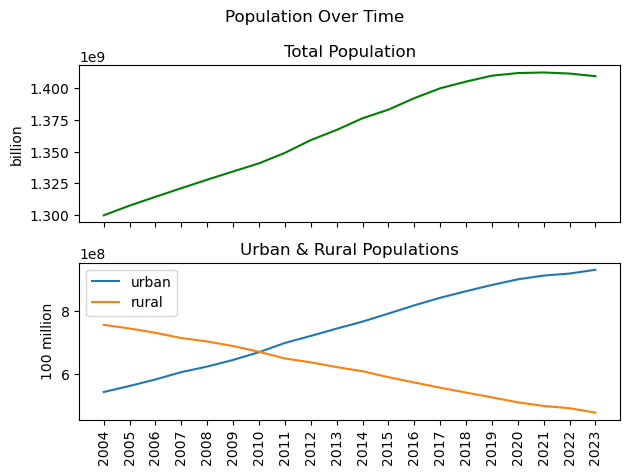

In [17]:
x = usd['year']
y1 = usd['pop_total']
y2 = usd['pop_urban']
y3 = usd['pop_rural']

fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True)
fig.suptitle('Population Over Time')

ax1.plot(x, y1, 'g')
ax1.set_title('Total Population')
ax1.set_ylabel('billion')

ax2.plot(x, y2, label = 'urban')
ax2.plot(x, y3, label = 'rural')
ax2.set_title('Urban & Rural Populations')
ax2.set_ylabel('100 million')
ax2.legend()

for ax in [ax1, ax2]:
    ax.set_xticks(x)
    ax.set_xticklabels(x, rotation=90) 

plt.tight_layout()
plt.show()

In [18]:
# change in total population

pop_2023 = usd.at[0,'pop_total']
pop_2004 = usd.at[19, 'pop_total']

increase = pop_2023 - pop_2004
percent_change = round((increase / pop_2004) * 100, 2)

print(f"population increase: {increase}")
print(f"population % increase: {percent_change}%")

# rural vs urban percentage

urban_2023 = usd.at[0,'pop_urban']
urban_2004 = usd.at[19, 'pop_urban']
rural_2023 = usd.at[0,'pop_rural']
rural_2004 = usd.at[19, 'pop_rural']

pct_rural_2004 = round((rural_2004 / pop_2004) * 100, 0)
pct_urban_2004 = round((urban_2004 / pop_2004) * 100, 0)
pct_rural_2023 = round((rural_2023 / pop_2023) * 100, 0)
pct_urban_2023 = round((urban_2023 / pop_2023) * 100, 0)

pct_change_urban = round(( (urban_2023 - urban_2004) / urban_2004) * 100, 0)

print(f"2004: urban {pct_urban_2004}%, rural {pct_rural_2004}%")
print(f"2023: urban {pct_urban_2023}%, rural {pct_rural_2023}%")
print(f"urban change {pct_change_urban}%")

population increase: 109790000
population % increase: 8.45%
2004: urban 42.0%, rural 58.0%
2023: urban 66.0%, rural 34.0%
urban change 72.0%


Total population increased annually, reaching it's peak in 2021. 2023 saw a nearly 3 million person decrease since 2021.

The population has steadily become more urban and less rural.

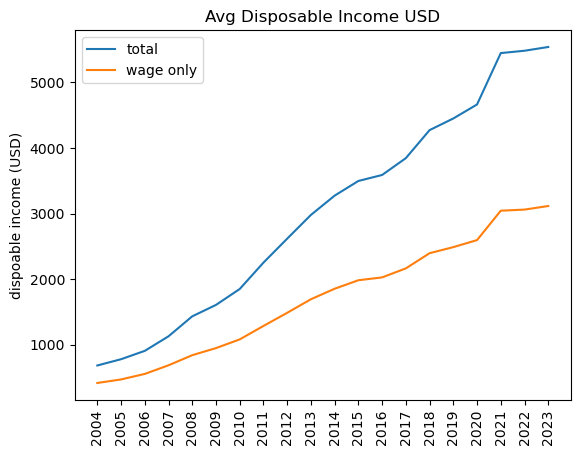

In [19]:
x = usd['year']
y1 = usd['income_per_capita_usd']
y2 = usd['wage_income_usd']

plt.plot(x, y1, label = 'total')
plt.plot(x, y2, label = 'wage only')

plt.title('Avg Disposable Income USD')
plt.ylabel('dispoable income (USD)')
plt.legend()
plt.xticks(df1['year'], rotation = 90)

plt.show()

In [20]:
# disposable income change

income_2023 = usd.at[0,'income_per_capita_usd']
income_2004 = usd.at[19, 'income_per_capita_usd']
wage_2023 = usd.at[0,'wage_income_usd']
wage_2004 = usd.at[19, 'wage_income_usd']

income_increase = income_2023 - income_2004
wage_increase = wage_2023 - wage_2004

pct_change_income = round((income_increase / income_2004) * 100, 0)
pct_change_wage = round((wage_increase / wage_2004) * 100, 0)

income_times = round((income_2023 / income_2004), 0)
wage_times = round((wage_2023 / wage_2004), 0)

print(f"total change {pct_change_income}%")
print(f"wage only change {pct_change_wage}%")
print(f"total {income_times}x more")
print(f"wage {wage_times}x more")

total change 710.0%
wage only change 647.0%
total 8.0x more
wage 7.0x more


Disposable income has been continually trending upward. Total disposable income has increased at a faster rate than wage disposable income.

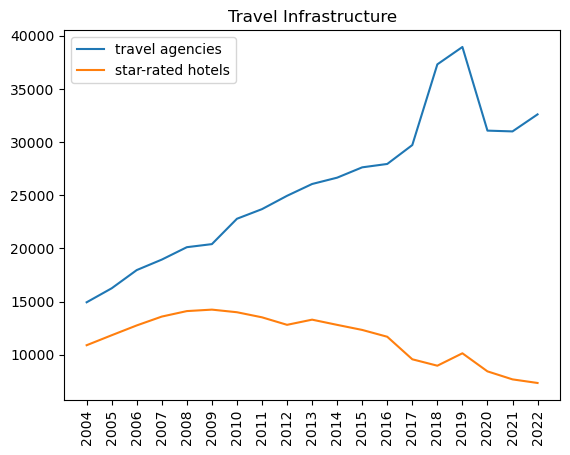

In [21]:
exclude_2023 = usd[usd['year'] < 2023] # 2023 data were originally nulls that were backfilled

x = exclude_2023['year']
y1 = exclude_2023['travel_agencies']
y2 = exclude_2023['star_hotels']

plt.plot(x, y1, label = 'travel agencies')
plt.plot(x, y2, label = 'star-rated hotels')

plt.title('Travel Infrastructure')
plt.legend()
plt.xticks(exclude_2023['year'], rotation = 90)

plt.show()

As the number of travel agencies have increased, the amount of star-rated hotels have decreased. Both spiked in 2019.

Travel agencies have increased since 2021, but hotels have not.

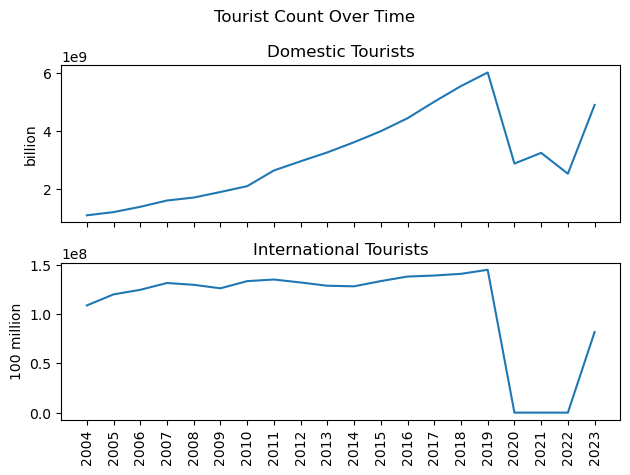

In [22]:
x = usd['year']
y1 = usd['domestic_tourists']
y2 = usd['intl_tourists']

fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True)
fig.suptitle('Tourist Count Over Time')

ax1.plot(x, y1)
ax1.set_title('Domestic Tourists')
ax1.set_ylabel('billion')


ax2.plot(x, y2)
ax2.set_title('International Tourists')
ax2.set_ylabel('100 million')

for ax in [ax1, ax2]:
    ax.set_xticks(x)
    ax.set_xticklabels(x, rotation=90) 

plt.tight_layout()
plt.show()

Between 2004 and 2019 number of domestic tourists increased 18% (4.9 billion) and international tourists increased 75% (36 million).

Both drastically fell during 2020.

Travel restrictions were imposed from March 2020 to January 2023 baring international visitors accounting for lack of international tourists during those times.

Both have picked back up after restrictions were lifted, but have no returned to 2019 levels.

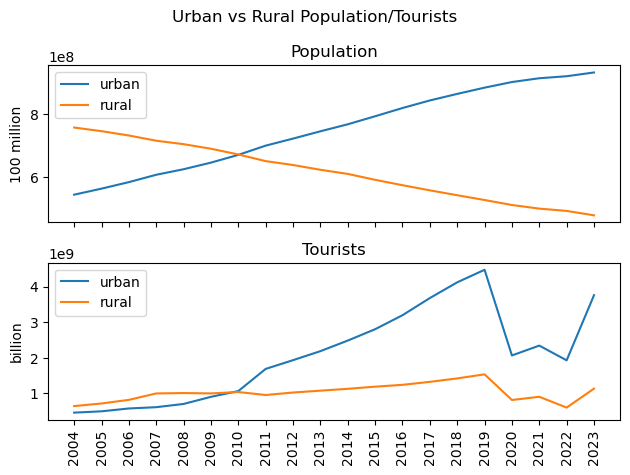

In [23]:
x = usd['year']
y1 = usd['pop_urban']
y2 = usd['pop_rural']
y3 = usd['urban_dom_tourists']
y4 = usd['rural_dom_tourists']

fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True)
fig.suptitle('Urban vs Rural Population/Tourists')

ax1.plot(x, y1, label = 'urban')
ax1.plot(x, y2, label = 'rural')
ax1.set_title('Population')
ax1.set_ylabel('100 million')
ax1.legend()

ax2.plot(x, y3, label = 'urban')
ax2.plot(x, y4, label = 'rural')
ax2.set_title('Tourists')
ax2.set_ylabel('billion')
ax2.legend()

for ax in [ax1, ax2]:
    ax.set_xticks(x)
    ax.set_xticklabels(x, rotation=90) 

plt.tight_layout()
plt.show()

2010 marks the point when the urban population begins to outnumber the rural population. It is also when urban citizens are the larger share of domestic tourists.

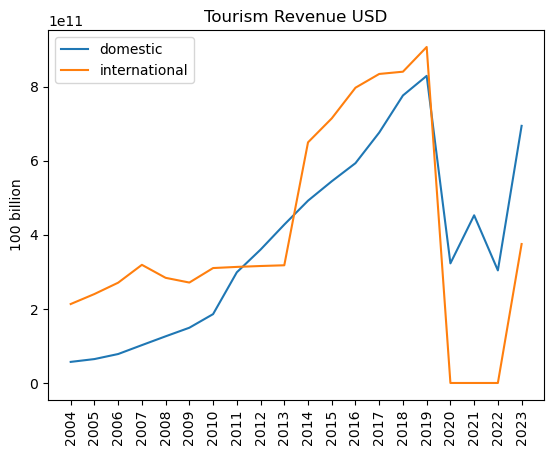

In [24]:
x = usd['year']
y1 = usd['dom_tourism_revenue_usd']
y2 = usd['intl_tourism_revenue_usd']

plt.plot(x, y1, label = 'domestic')
plt.plot(x, y2, label = 'international')

plt.title('Tourism Revenue USD')
plt.ylabel('100 billion')
plt.legend()
plt.xticks(usd['year'], rotation = 90)

plt.show()

Overall tourism revenue has increased.

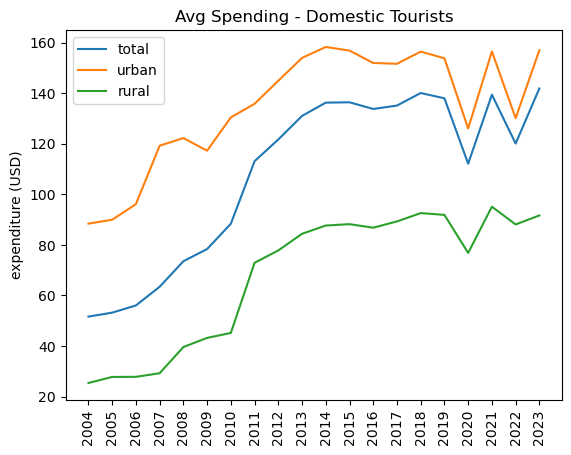

In [25]:
x = usd['year']
y0 = usd['per_capita_dom_tourism_exp_usd']
y1 = usd['urban_per_capita_tourism_exp_usd']
y2 = usd['rural_per_capita_tourism_exp_usd']

plt.plot(x, y0, label = 'total')
plt.plot(x, y1, label = 'urban')
plt.plot(x, y2, label = 'rural')

plt.title('Avg Spending - Domestic Tourists')
plt.ylabel('expenditure (USD)')
plt.legend()
plt.xticks(usd['year'], rotation = 90)

plt.show()

Urban tourists spend 2x more on average than rural tourists.

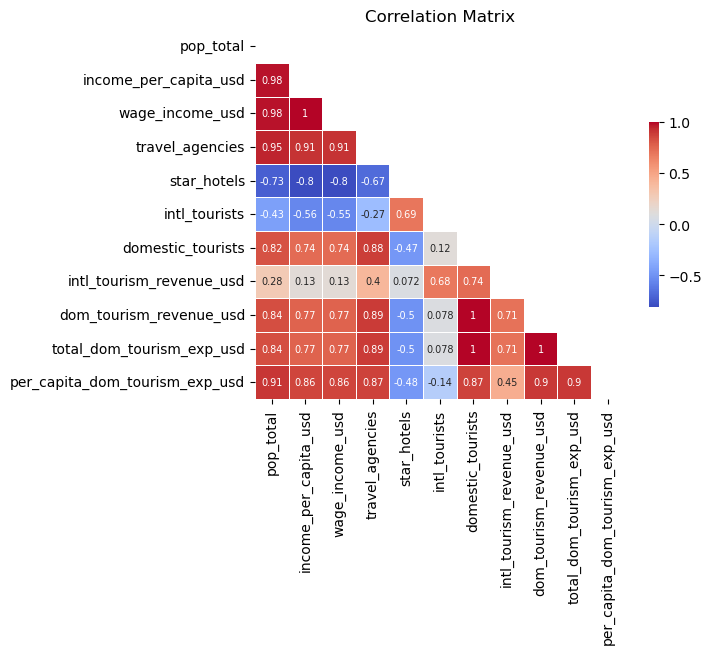

In [26]:
for_matrix = usd[[
    'pop_total',
    'income_per_capita_usd',
    'wage_income_usd',
    'travel_agencies',
    'star_hotels',
    'intl_tourists',
    'domestic_tourists',
    'intl_tourism_revenue_usd',
    'dom_tourism_revenue_usd',
    'total_dom_tourism_exp_usd',
    'per_capita_dom_tourism_exp_usd']]

corr_matrix = for_matrix.corr()

# mask duplicates
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr_matrix, mask=mask, square=True, 
            cmap = 'coolwarm', linewidth=.5, cbar_kws={'shrink': .5}, 
            annot = True, annot_kws={"fontsize":7})

plt.title('Correlation Matrix')

plt.show()

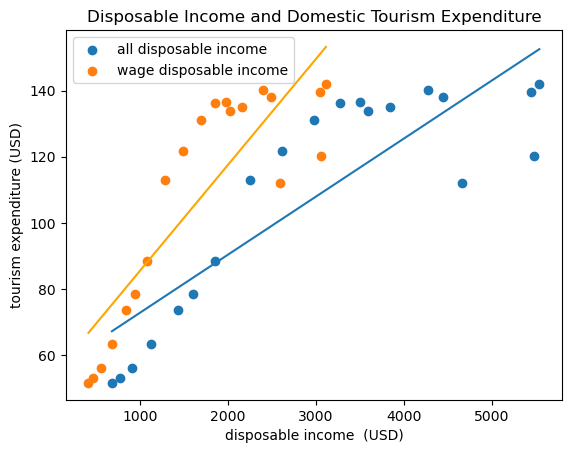

In [27]:
x1 = usd['income_per_capita_usd']
x2 = usd['wage_income_usd']
y = usd['per_capita_dom_tourism_exp_usd']

plt.scatter(x1, y, label = 'all disposable income')
plt.scatter(x2, y, label = 'wage disposable income')

m, b = np.polyfit(x1, y, 1)
plt.plot(x1, m * x1 + b)
m2, b2 = np.polyfit(x2, y, 1)
plt.plot(x2, m2 * x2 + b2, color = 'orange')

plt.xlabel('disposable income  (USD)')
plt.ylabel('tourism expenditure (USD)')
plt.title('Disposable Income and Domestic Tourism Expenditure')
plt.legend()

plt.show()

As disposable income increases so does domestic tourist expenditures. 

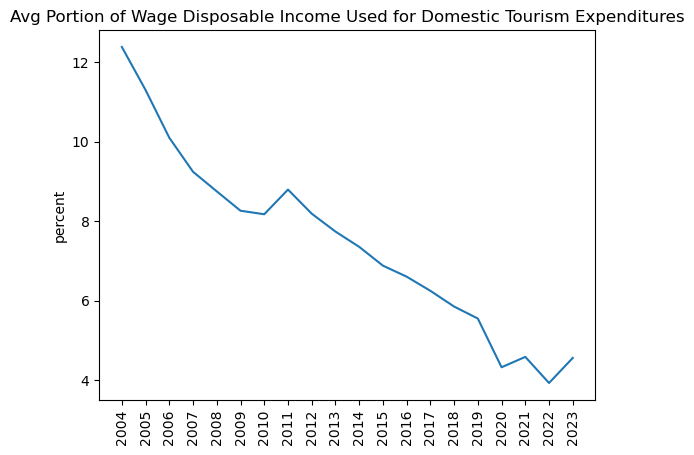

In [28]:
x = usd['year']
y = usd['per_capita_dom_tourism_exp_usd'] / usd['wage_income_usd'] * 100

plt.plot(x,y)

plt.title('Avg Portion of Wage Disposable Income Used for Domestic Tourism Expenditures')
plt.ylabel('percent')
plt.xticks(usd['year'], rotation = 90)

plt.show()

In [73]:
pct_spent = (usd['per_capita_dom_tourism_exp_usd'] / usd['wage_income_usd']) * 100
avg_pct_spent = pct_spent.mean()

print(round(pct_spent,1))
print(round(avg_pct_spent,1))

0      4.6
1      3.9
2      4.6
3      4.3
4      5.5
5      5.8
6      6.2
7      6.6
8      6.9
9      7.4
10     7.7
11     8.2
12     8.8
13     8.2
14     8.3
15     8.7
16     9.2
17    10.1
18    11.3
19    12.4
dtype: float64
7.4


Chinese people are spending a smaller portion of their disposable income on domestic tourism expenditures even though overall they're making more and spending more.

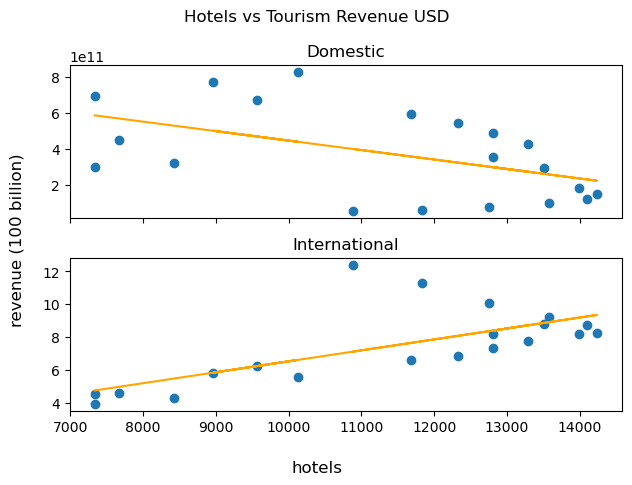

In [29]:
x = usd['star_hotels']
y1 = usd['dom_tourism_revenue_usd']
y2 = usd['intl_tourism_revenue_usd']

# remove outliers from COVID ($0 revenue)
mask = (x != 0) & (y != 0)
x_filtered = x[mask]
y_filtered = y[mask]

fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True)

ax1.scatter(x, y1)
m, b = np.polyfit(x, y1, 1)
ax1.plot(x, m * x + b, color = 'orange')
ax1.set_title('Domestic')

ax2.scatter(x_filtered, y_filtered,label = 'international')
m2, b2 = np.polyfit(x, y_filtered, 1)
ax2.plot(x_filtered, m2 * x_filtered + b2, color = 'orange')
ax2.set_title('International')

fig.suptitle('Hotels vs Tourism Revenue USD')
fig.supxlabel('hotels')
fig.supylabel('revenue (100 billion)')


plt.tight_layout()
plt.show()

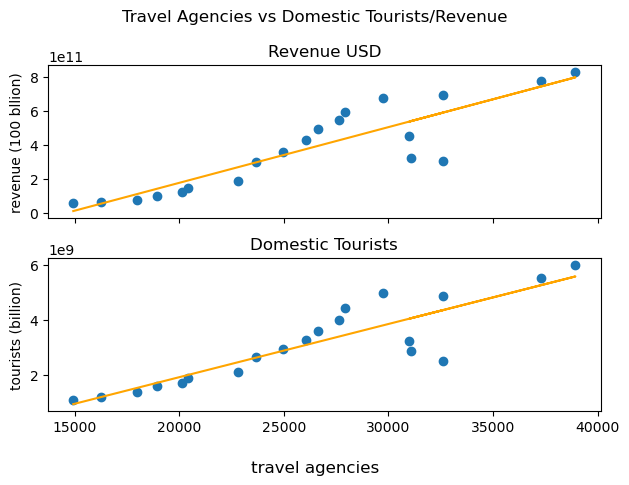

In [30]:
x = usd['travel_agencies']
y1 = usd['dom_tourism_revenue_usd']
y2 = usd['domestic_tourists']

fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True)
fig.suptitle('Travel Agencies vs Domestic Tourists/Revenue')
fig.supxlabel('travel agencies')

ax1.scatter(x, y1)
m, b = np.polyfit(x, y1, 1)
ax1.plot(x, m * x + b, color = 'orange')
ax1.set_title('Revenue USD')
ax1.set_ylabel('revenue (100 bllion)')

ax2.scatter(x, y2)
m2, b2 = np.polyfit(x, y2, 1)
ax2.plot(x, m2 * x + b2, color = 'orange')
ax2.set_title('Domestic Tourists')
ax2.set_ylabel('tourists (billion)')

plt.tight_layout()
plt.show()

The number of domestic tourists and domestic tourism revenue increases as the number of travel agencies increase.

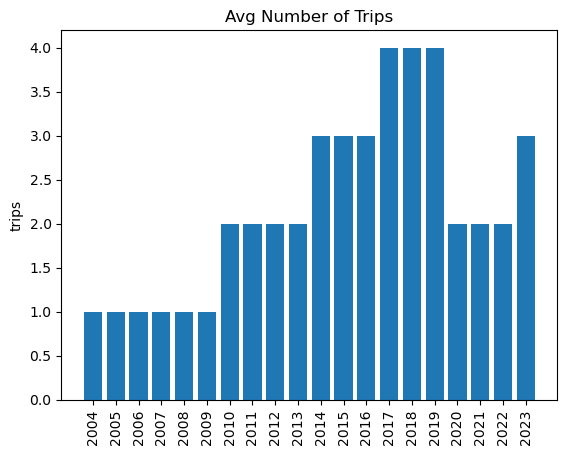

In [31]:
x = usd['year']
y = round(usd['domestic_tourists'] / usd['pop_total'], 0)

plt.bar(x, y)

plt.title('Avg Number of Trips')
plt.ylabel('trips')
plt.xticks(usd['year'], rotation = 90)

plt.show()

Domestic tourists are counted as one tourist per trip.

Average number of trips per citizen by distributing total domestic tourists (trips) between total population. Realistically the total number of trips would be distributed between a smaller population of verified citizens who did travel domestically for any given year.

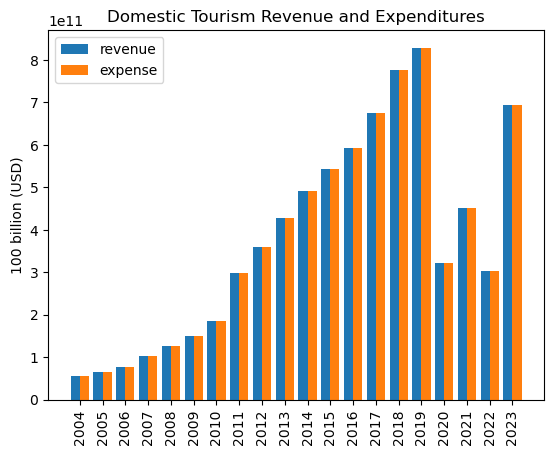

In [32]:
x = usd['year']
y1 = usd['dom_tourism_revenue_usd']
y2 = usd['total_dom_tourism_exp_usd']

plt.bar(x - 0.2, y1, 0.4, label = 'revenue') 
plt.bar(x + 0.2, y2, 0.4, label = 'expense')

plt.ylabel("100 billion (USD)") 
plt.title("Domestic Tourism Revenue and Expenditures") 
plt.legend()
plt.xticks(usd['year'], rotation = 90)

plt.show()

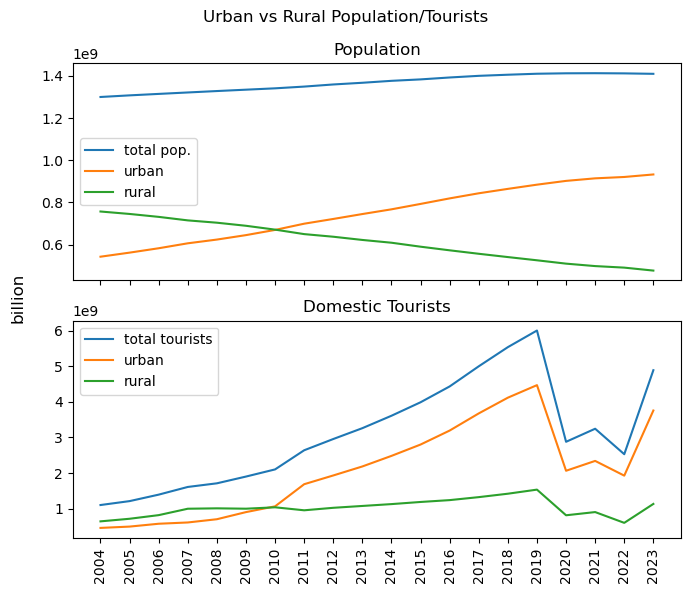

In [33]:
x = usd['year']
y0 = usd['pop_total']
y1 = usd['pop_urban']
y2 = usd['pop_rural']
y3 = usd['urban_dom_tourists']
y4 = usd['rural_dom_tourists']
y5 = usd['domestic_tourists']

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7,6), sharex = True )
fig.suptitle('Urban vs Rural Population/Tourists')
fig.supylabel('billion')

ax1.plot(x, y0, label = 'total pop.')
ax1.plot(x, y1, label = 'urban')
ax1.plot(x, y2, label = 'rural')
ax1.set_title('Population')
ax1.legend()

ax2.plot(x, y5, label = 'total tourists')
ax2.plot(x, y3, label = 'urban')
ax2.plot(x, y4, label = 'rural')
ax2.set_title('Domestic Tourists')
ax2.legend()

for ax in [ax1, ax2]:
    ax.set_xticks(x)
    ax.set_xticklabels(x, rotation=90) 

plt.tight_layout()
plt.show()

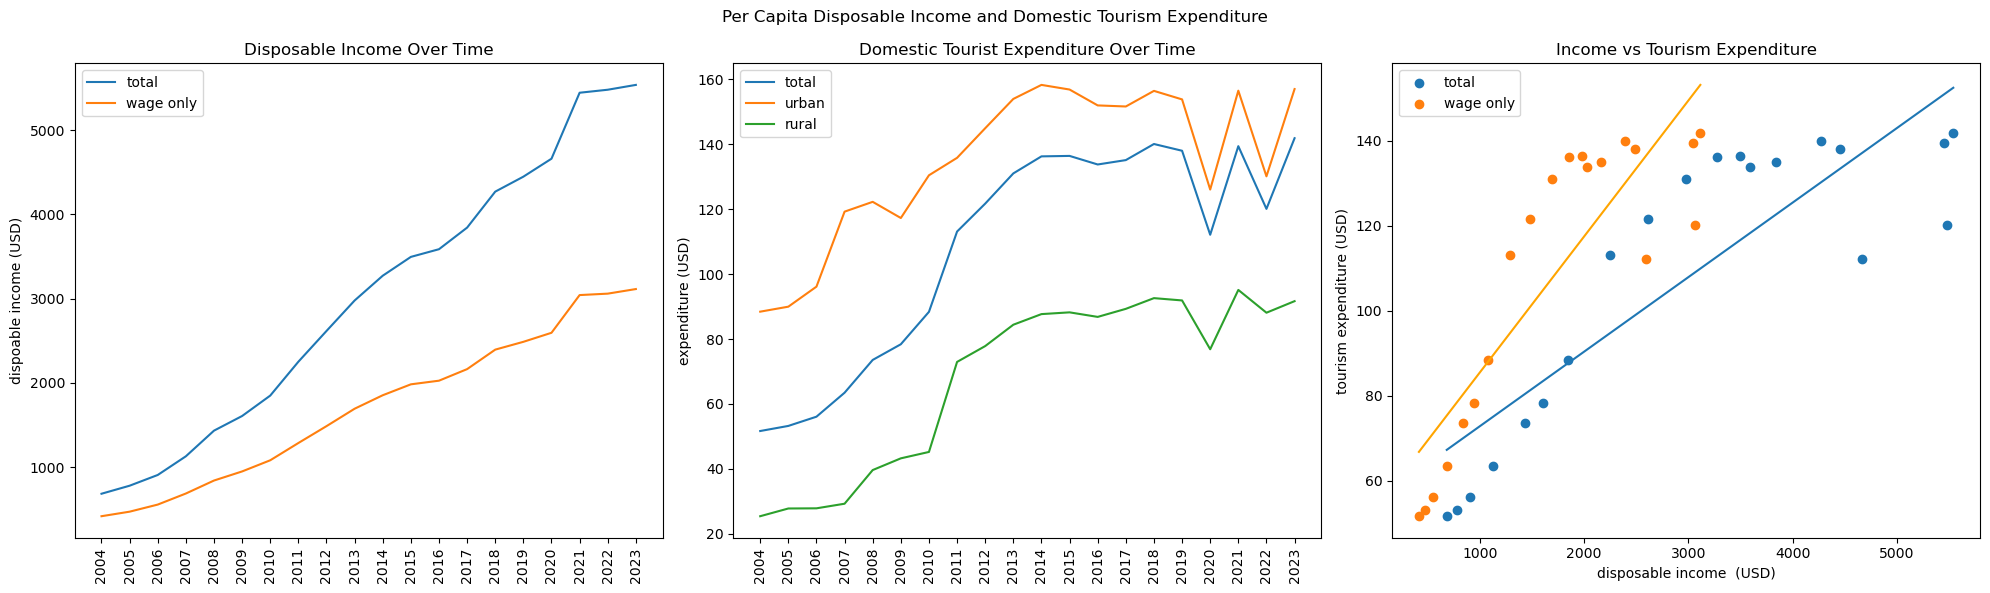

In [46]:
# ax1
x1 = usd['year']
y1 = usd['income_per_capita_usd']
y2 = usd['wage_income_usd']

# ax2
y3 = usd['per_capita_dom_tourism_exp_usd']
y4 = usd['urban_per_capita_tourism_exp_usd']
y5 = usd['rural_per_capita_tourism_exp_usd']

# ax3
x2 = usd['income_per_capita_usd']
x3 = usd['wage_income_usd']
y6 = usd['per_capita_dom_tourism_exp_usd']
m1, b1 = np.polyfit(x2, y6, 1)
m2, b2 = np.polyfit(x3, y6, 1)

fig, (ax1, ax2, ax3) = plt.subplots (1, 3, figsize=(20, 6))
fig.suptitle('Per Capita Disposable Income and Domestic Tourism Expenditure')

ax1.plot(x1, y1, label = 'total')
ax1.plot(x1, y2, label = 'wage only')
ax1.set_title('Disposable Income Over Time')
ax1.set_ylabel('dispoable income (USD)')
ax1.legend()

for ax in [ax1, ax2]:
    ax.set_xticks(x1)
    ax.set_xticklabels(x1, rotation=90)

ax2.plot(x1, y3, label = 'total')
ax2.plot(x1, y4, label = 'urban')
ax2.plot(x1, y5, label = 'rural')
ax2.set_title('Domestic Tourist Expenditure Over Time')
ax2.set_ylabel('expenditure (USD)')
ax2.legend()

ax3.scatter(x2, y6, label = 'total')
ax3.scatter(x3, y6, label = 'wage only')
ax3.plot(x2, m1 * x2 + b1)
ax3.plot(x3, m2 * x3 + b2, color = 'orange')
ax3.set_xlabel('disposable income  (USD)')
ax3.set_ylabel('tourism expenditure (USD)')
ax3.set_title('Income vs Tourism Expenditure')
ax3.legend()

plt.tight_layout()
plt.show()